In [1]:
%matplotlib inline
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import glob
import math
from scipy.stats.mstats import linregress
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
files=sorted(glob.glob('/home/z5241410/Desktop/UNSW/CERES_data/FluxByCld_CERES/Cloud_data/CERES_FluxByCldTyp_*.nc'))
DS1=xr.open_mfdataset(files,combine='nested',concat_dim='time')

In [3]:
lat=DS1.lat
lon=DS1.lon
time=DS1.time

In [4]:
wt = np.cos(np.deg2rad(lat))
wt1=np.mean(wt)
Ds1=(DS1*wt)/wt1
ds1=Ds1.sel(time=slice('2002-07-15','2019-12-15'),lat=slice(-30,30))

In [5]:
def take_anom(arg):
    anom=(arg.groupby('time.month'))-(arg.groupby('time.month').mean('time'))
    return(anom)

In [6]:
def linear_regression(x,y):
    slope,intercept,rvalue,pvalue,stderr=linregress(x,y)
    return[slope,rvalue,pvalue,stderr]

In [7]:
def ONDJ_avg (arg):
    filtr = (arg['time.month']>=10)+(arg['time.month']==1)
    ondj_avg=arg.where(filtr).resample(time='AS-Oct',skipna=True).mean()
    return(ondj_avg)

In [8]:
yrs=np.arange(2002,2020)
nin= np.array([27.812,27.005,27.3375,26.0175,27.52,25.09,26.005,28.0425,25.0225,25.6,26.5475,26.39,27.245,29.2175,26.035,25.77,27.4775,27.17])
nino=xr.DataArray(data=nin, coords=[yrs], dims=['time'])
nino

<xarray.DataArray (time: 18)>
array([27.812 , 27.005 , 27.3375, 26.0175, 27.52  , 25.09  , 26.005 ,
       28.0425, 25.0225, 25.6   , 26.5475, 26.39  , 27.245 , 29.2175,
       26.035 , 25.77  , 27.4775, 27.17  ])
Coordinates:
  * time     (time) int64 2002 2003 2004 2005 2006 ... 2015 2016 2017 2018 2019

In [9]:
    nino_raw=np.array([0.74,   0.87,   1.09,   1.25,   1.47,   1.37,
    0.60,   0.64,   0.36,  -0.14,  -0.61,  -0.29,   0.21,   0.26,   0.27,   0.42,   0.33,   0.43,
    0.27,   0.23,   0.12,   0.07,   0.06,   0.13,   0.49,   0.76,   0.81,   0.73,   0.66,   0.74,
    0.66,   0.36,   0.45,   0.26,   0.30,   0.04,  -0.23,  -0.05,  -0.04,  -0.06,  -0.59,  -0.92,
   -0.91,  -0.67,  -0.71,  -0.32,  -0.09,   0.00,   0.01,   0.31,   0.60,   0.70,   0.99,   1.14,
    0.70,   0.13,  -0.18,  -0.32,  -0.47,  -0.35,  -0.59,  -0.72,  -1.11,  -1.39,  -1.54,  -1.58,
   -1.68,  -1.67,  -1.21,  -0.99,  -0.84,  -0.68,  -0.30,  -0.13,  -0.25,  -0.35,  -0.46,  -0.86,
   -0.89,  -0.79,  -0.69,  -0.35,   0.06,   0.31,   0.48,   0.56,   0.68,   0.89,   1.46,   1.74,
    1.52,   1.25,   0.90,   0.38,  -0.22,  -0.69,  -1.07,  -1.39,  -1.60,  -1.69,  -1.64,  -1.60,
   -1.54,  -1.11,  -0.93,  -0.77,  -0.52,  -0.38,  -0.43,  -0.65,  -0.80,  -1.05,  -1.19,  -1.06,
   -0.87,  -0.67,  -0.61,  -0.50,  -0.32,   0.02,   0.25,   0.47,   0.38,   0.26,   0.16,  -0.25,
   -0.53,  -0.52,  -0.25,  -0.25,  -0.40,  -0.42,  -0.39,  -0.38,  -0.18,  -0.20,  -0.14,  -0.17,
   -0.49,  -0.62,  -0.28,   0.08,   0.32,   0.23,  -0.06,  -0.03,   0.29,   0.44,   0.75,   0.71,
    0.51,   0.42,   0.47,   0.70,   0.92,   1.18,   1.46,   1.93,   2.21,   2.36,   2.72,   2.66,
    2.57,   2.26,   1.62,   0.91,   0.30,  -0.03,  -0.48,  -0.58,  -0.58,  -0.74,  -0.76,  -0.50,
   -0.43,  -0.08,   0.03,   0.22,   0.37,   0.34,   0.25,  -0.16,  -0.43,  -0.56,  -0.97,  -0.98,
   -0.98,  -0.78,  -0.80,  -0.51,  -0.20,   0.04,   0.12,   0.09,   0.47,   0.90,   0.90,   0.89,
    0.65,   0.71,   0.81,   0.62,   0.55,   0.45,   0.35,   0.04,   0.03,   0.48,   0.52,   0.52])
    
nino_anom=xr.DataArray(data=nino_raw,coords=[ds1.time])
nino_a=ONDJ_avg(nino_anom)[1:]

# FROM HERE, PLEASE SKIP THE BELOW STEPS AND GO TO THE NEXT PART WHERE MARKED WITH A HEADING

### BELOW IS THE ANALYSIS OF 3 LEVELS WITHIN CIRROSTRATUS BIN

In [10]:
# 3 LEVELS WITHIN CIRROSTRATUS CLOUD BIN

In [11]:
common=take_anom(ds1.cldarea_cldtyp_mon)

# 3 levels within cirrostratus bin
cirro_lev1=common[2:4,4,:].sum('opt').mean('lat').mean('lon')
cirro_lev2=common[2:4,5,:].sum('opt').mean('lat').mean('lon')
cirro_lev3=common[2:4,6,:].sum('opt').mean('lat').mean('lon')

cirro_l1_ondj=ONDJ_avg(cirro_lev1)[1:]
cirro_l2_ondj=ONDJ_avg(cirro_lev2)[1:]
cirro_l3_ondj=ONDJ_avg(cirro_lev3)[1:]

# 3 levels within high cloud bin
high_lev1=common[:,4,:].sum('opt').mean('lat').mean('lon')
high_lev2=common[:,5,:].sum('opt').mean('lat').mean('lon')
high_lev3=common[:,6,:].sum('opt').mean('lat').mean('lon')

hi_l1_ondj=ONDJ_avg(high_lev1)[1:]
hi_l2_ondj=ONDJ_avg(high_lev2)[1:]
hi_l3_ondj=ONDJ_avg(high_lev3)[1:]

In [12]:
# The below analysis shows that the clouds in both the 1st and 2nd levels within cirrostratus bin are 
# highly and significantly correlated with surface warming, where as the 3rd level does'nt show 
# any significant relationship

In [13]:
linear_regression(nino_a,cirro_l1_ondj)

[-0.061209140682762224,
 -0.556178726754157,
 0.01653366690639022,
 0.022865237259451998]

In [14]:
linear_regression(nino_a,cirro_l2_ondj)

[-0.12219401163937792,
 -0.7864767721400905,
 0.00010840915117036348,
 0.02398972562879778]

In [15]:
linear_regression(nino_a,cirro_l3_ondj)

[-0.0016966009774202558,
 -0.06391837356418091,
 0.8010632917086088,
 0.006622241597335575]

In [145]:
# The below analysis is done for the 3 levels within the high cloud bin, which shows that the cloud cover
# has a positive relation with the nino index in the 3rd level, showing that the cloud amount in the upper bin
# increases with warming/ the clouds move to greater heights with warming. Pvalues are not above 0.05 for any of them,
# but are close to significance level.

In [142]:
linear_regression(nino_a,hi_l1_ondj)

[-0.10224491303030027,
 -0.4243976319382693,
 0.0791938594274571,
 0.05453630050756887]

In [143]:
linear_regression(nino_a,hi_l2_ondj)

[-0.11357760712269666,
 -0.3540526436577126,
 0.1494535800264295,
 0.07500344629927615]

In [144]:
linear_regression(nino_a,hi_l3_ondj)

[0.047520280101469456,
 0.44914979749798345,
 0.061505753482827406,
 0.02363203870566809]

-0.061209140682762196 -0.12219401163937786 -0.0016966009774202553


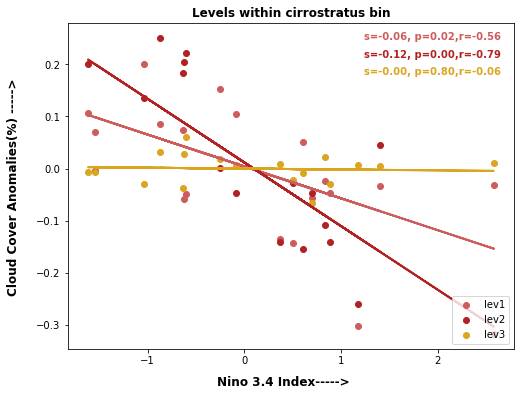

In [153]:
# within cirrostratus cloud bin, 3 levels

fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(nino_a, cirro_l1_ondj,color='indianred',label='lev1')
slope4,intercept4=np.polyfit(nino_a,cirro_l1_ondj,1)
Y4=slope4*nino_a+intercept4
ax.plot(nino_a,Y4,color='indianred',linewidth=2)

ax.scatter(nino_a,cirro_l2_ondj,color='firebrick',label='lev2')
slope5,intercept5=np.polyfit(nino_a,cirro_l2_ondj,1)
Y5=slope5*nino_a+intercept5
ax.plot(nino_a,Y5,color='firebrick',linewidth=2)

ax.scatter(nino_a,cirro_l3_ondj,color='goldenrod',label='lev3')
slope6,intercept6=np.polyfit(nino_a,cirro_l3_ondj,1)
Y6=slope6*nino_a+intercept6
ax.plot(nino_a,Y6,color='goldenrod',linewidth=2)

ax.legend()
ax.legend(loc='lower right')

print(slope4,slope5,slope6)

fig.text(0.64, 0.84, 's=-0.06, p=0.02,r=-0.56', ha='left',size=10,fontweight='bold',color='indianred')
fig.text(0.64, 0.80, 's=-0.12, p=0.00,r=-0.79', ha='left',size=10,fontweight='bold',color='firebrick')
fig.text(0.64, 0.76, 's=-0.00, p=0.80,r=-0.06', ha='left',size=10,fontweight='bold',color='goldenrod')


fig.text(0.02, 0.5, 'Cloud Cover Anomalies(%) ----->', va='center', rotation='vertical',size=12,fontweight='bold')
fig.text(0.5, 0.04, 'Nino 3.4 Index----->', ha='center',size=12,fontweight='bold')
plt.title('Levels within cirrostratus bin',fontweight='bold')

plt.savefig('3levels_cirro',dpi=300, bbox_inches='tight')

# SEE BELOW 

In [ ]:
#Now, trying to reproduce the CF x Nino relation for all the 9 cloud types, which was the intial step of the whole project. 
#Doing it once again, since the weightage might have been wrong before.


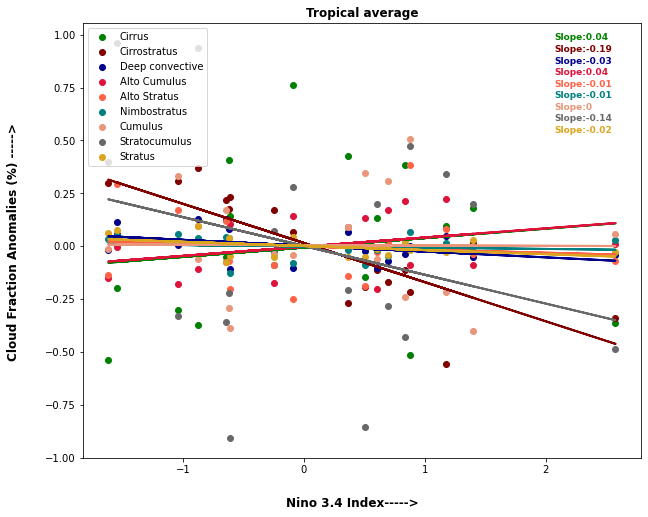

In [155]:
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(nino_a, c1,color='green',label='Cirrus')
slope1,intercept1=np.polyfit(nino_a,c1,1)
Y1=slope1*nino_a+intercept1
ax.plot(nino_a,Y1,color='green',linewidth=2)

ax.scatter(nino_a,c2,color='maroon',label='Cirrostratus')
slope2,intercept2=np.polyfit(nino_a,c2,1)
Y2=slope2*nino_a+intercept2
ax.plot(nino_a,Y2,color='maroon',linewidth=2)

ax.scatter(nino_a,c3,color='darkblue',label='Deep convective')
slope3,intercept3=np.polyfit(nino_a,c3,1)
Y3=slope3*nino_a+intercept3
ax.plot(nino_a,Y3,color='darkblue',linewidth=2)

ax.scatter(nino_a,c4,color='crimson',label='Alto Cumulus')
slope4,intercept4=np.polyfit(nino_a,c4,1)
Y4=slope4*nino_a+intercept4
ax.plot(nino_a,Y4,color='crimson',linewidth=2)#tomato,darksalmon,sienna,teal


ax.scatter(nino_a,c5,color='tomato',label='Alto Stratus')
slope5,intercept5=np.polyfit(nino_a,c5,1)
Y5=slope5*nino_a+intercept5
ax.plot(nino_a,Y5,color='tomato',linewidth=2)

ax.scatter(nino_a,c6,color='teal',label='Nimbostratus')
slope6,intercept6=np.polyfit(nino_a,c6,1)
Y6=slope6*nino_a+intercept6
ax.plot(nino_a,Y6,color='teal',linewidth=2)

ax.scatter(nino_a,c7,color='darksalmon',label='Cumulus')
slope7,intercept7=np.polyfit(nino_a,c7,1)
Y7=slope7*nino_a+intercept7
ax.plot(nino_a,Y7,color='darksalmon',linewidth=2)

ax.scatter(nino_a,c8,color='dimgrey',label='Stratocumulus')
slope8,intercept8=np.polyfit(nino_a,c8,1)
Y8=slope8*nino_a+intercept8
ax.plot(nino_a,Y8,color='dimgrey',linewidth=2)

ax.scatter(nino_a,c9,color='goldenrod',label='Stratus')
slope9,intercept9=np.polyfit(nino_a,c9,1)
Y9=slope9*nino_a+intercept9
ax.plot(nino_a,Y9,color='goldenrod',linewidth=2)

ax.legend()
ax.legend(loc='upper left')

fig.text(0.78, 0.85, 'Slope:0.04', ha='left',size=9,fontweight='bold',color='green')
fig.text(0.78, 0.83, 'Slope:-0.19', ha='left',size=9,fontweight='bold',color='maroon')
fig.text(0.78, 0.81, 'Slope:-0.03', ha='left',size=9,fontweight='bold',color='darkblue')
fig.text(0.78, 0.79, 'Slope:0.04', ha='left',size=9,fontweight='bold',color='crimson')
fig.text(0.78, 0.77, 'Slope:-0.01', ha='left',size=9,fontweight='bold',color='tomato')
fig.text(0.78, 0.75, 'Slope:-0.01', ha='left',size=9,fontweight='bold',color='teal')
fig.text(0.78, 0.73, 'Slope:0', ha='left',size=9,fontweight='bold',color='darksalmon')
fig.text(0.78, 0.71, 'Slope:-0.14', ha='left',size=9,fontweight='bold',color='dimgrey')
fig.text(0.78, 0.69, 'Slope:-0.02', ha='left',size=9,fontweight='bold',color='goldenrod')


fig.text(0.02, 0.5, 'Cloud Fraction Anomalies (%) ----->', va='center', rotation='vertical',size=12,fontweight='bold')
fig.text(0.5, 0.04, 'Nino 3.4 Index----->', ha='center',size=12,fontweight='bold')
plt.title('Tropical average',fontweight='bold')

plt.savefig('ALL_clouds_May1_2021',dpi=300, bbox_inches='tight')

# LINEAR REGRESSION FOR THE ABOVE PLOT

In [ ]:
# linear regression with nino and nino_a are the same

In [37]:
step1=take_anom(ds1.cldarea_cldtyp_mon)
step1a=ONDJ_avg(step1)
step2=step1a[:,:,1:,:]
c1=step2[0:2,4:,:].sum('opt').sum('press').mean('lat').mean('lon')
c2=step2[2:4,4:,:].sum('opt').sum('press').mean('lat').mean('lon')
c3=step2[4:,4:,:].sum('opt').sum('press').mean('lat').mean('lon')
c4=step2[0:2,2:4,:].sum('opt').sum('press').mean('lat').mean('lon')
c5=step2[2:4,2:4,:].sum('opt').sum('press').mean('lat').mean('lon')
c6=step2[4:,2:4,:].sum('opt').sum('press').mean('lat').mean('lon')
c7=step2[0:2,0:2,:].sum('opt').sum('press').mean('lat').mean('lon')
c8=step2[2:4,0:2,:].sum('opt').sum('press').mean('lat').mean('lon')
c9=step2[4:,0:2,:].sum('opt').sum('press').mean('lat').mean('lon')


In [38]:
linear_regression(nino,c1)

[0.044221162542142464,
 0.13741508618995105,
 0.5866210303544183,
 0.07968859522530325]

In [39]:
linear_regression(nino,c2)

[-0.1850843457819421,
 -0.7935177132686283,
 8.49115960316177e-05,
 0.035485204049477394]

In [40]:
linear_regression(nino,c3)

[-0.02762746531675205,
 -0.3902345075440915,
 0.10937743582899849,
 0.016295993184102468]

In [41]:
linear_regression(nino,c4)

[0.043461269682022415,
 0.3369633148547278,
 0.17150977922010266,
 0.030359060032296457]

In [42]:
linear_regression(nino,c5)

[-0.014971196378359699,
 -0.09672232656175007,
 0.7026132845893616,
 0.038514898837743304]

In [43]:
linear_regression(nino,c6)

[-0.00628928962702151,
 -0.1264534262776557,
 0.6170780413052965,
 0.012334190587426202]

In [44]:
linear_regression(nino,c7)

[-0.0011697113652802554,
 -0.0049818357995753655,
 0.9843475307816694,
 0.058698083241684636]

In [45]:
linear_regression(nino,c8)

[-0.1374980247308558,
 -0.2837413263223708,
 0.25385488748746676,
 0.11616828600745796]

In [46]:
linear_regression(nino,c9)

[-0.019586802986672112,
 -0.429737951167705,
 0.07509525949250401,
 0.010288813911336544]